# Research on video games sales

<div style="border:groove 5px; padding: 40px">
<h4>I work for the online store "Ice", which sells video games all over the world.<br>
I'll identify patterns that determine whether a game succeeds or not. This will allow me spot potential big winners and plan advertising campaigns for our company.</h4>
I have  the data from the year that ended and i'm planning a campaign for next year.<br>
The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

### Table of Contents

* [Step 1. Open the data file and study the general information.](#step1)
* [step 1. conclusion](#step1.1)<br><br>
    
* [Step 2. Prepare the data](#step2.)
* [step 2. conclusion](#step2.2)<br><br>
    
* [Step 3. Analyze the data](#step3.)
    * [Conclusion on Games release by year:](#step3.a)
    * [Conclusion varied platforms sales:](#step3.b)
    * [Conclusion How long does it generally take for new platforms to appear and old ones to fade:](#step3.c)
    * [Conclusion  Finding the relevant period:](#step3.d)
    * [Conclusion differences in sales between platforms:](#step3.e)
    * [Conclusions critics influences:](#step3.f)
    * [Conclusions games by genre](#step3.g)
        * [step 3. conclusion](#step3.3)<br><br>
    
* [Step 4.Create a user profile for each region](#step4.)
    * [A)Top 5 profitable platform by regions](#step4.a)
    * [A)Conclusions platform sales by region](#step4.a.c)
    * [B)Top 5 profitable genres by regions](#step4.b)
    * [B)Conclusions platform sales by genre](#step4.b.c)
    * [C)Check if the ESRB rating affect sales by regions](#step4.c)
    * [c)Conclusions sales by ESRB rating](#step4.c.c)
        * [step 4. conclusion](#step4.4)<br><br>
        
* [Step 5. Test the hypotheses](#step5.)
    * [Hypothesis 1](#Hypothesis1.)
    * [Hypothesis 2](#Hypothesis2.)
        * [step 5. conclusion](#step5.5)
        
* [Step 6. Overall conclusion](#step6.)

**We will need to install this plugin for visualization later-**

In [1]:
pip install plotly==4.13.0

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip3 install squarify

Defaulting to user installation because normal site-packages is not writeable


## Step 1. Open the data file and study the general information <a class="anchor" id="step1"></a>

**We have a lot of libraries, and one DataFrame, we will check it:**

In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import matplotlib.patches as mpatches
import sys
import squarify
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.colors import ListedColormap
from matplotlib import cm
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
import math


df_games = pd.read_csv('/datasets/games.csv')

**We will create a function that checks whether there are values equal to 0 and if so what is their relative share:**

In [4]:
def zeros(data):
    for i in data.columns:
        if len(data[data[i]==0]) == 0:
            print(i , len(data[data[i]==0]))
        else:
            print(i,len(data[data[i]==0]),(round(len(data[data[i]==0])/len(data[i]),3)))

### We will do a series of tests for the data:

In [5]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


There seem to be a lot of null values and columns not of the desired type, we will fix this soon.

In [6]:
df_games.head(5)

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [7]:
df_games.tail(5)

Name Platform  Year_of_Release       Genre  \
16710  Samurai Warriors: Sanada Maru      PS3           2016.0      Action   
16711               LMA Manager 2007     X360           2006.0      Sports   
16712        Haitaka no Psychedelica      PSV           2016.0   Adventure   
16713               Spirits & Spells      GBA           2003.0    Platform   
16714            Winning Post 8 2016      PSV           2016.0  Simulation   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
16710      0.00      0.00      0.01          0.0           NaN        NaN   
16711      0.00      0.01      0.00          0.0           NaN        NaN   
16712      0.00      0.00      0.01          0.0           NaN        NaN   
16713      0.01      0.00      0.00          0.0           NaN        NaN   
16714      0.00      0.00      0.01          0.0           NaN        NaN   

      Rating  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN

In [8]:
df_games.sample(5)

Name Platform  Year_of_Release  \
2186                  Club Penguin: Game Day!      Wii           2010.0   
15751  Space Channel 5: Ulala's Cosmic Attack      GBA           2002.0   
5758                 Goemon's Great Adventure      N64           1998.0   
12625                       I Am In The Movie      PSP           2012.0   
2245               Monster High: Ghoul Spirit       DS           2011.0   

            Genre  NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score  \
2186       Sports      0.54      0.32      0.00         0.08           NaN   
15751        Misc      0.01      0.00      0.00         0.00          55.0   
5758     Platform      0.06      0.02      0.13         0.10           NaN   
12625  Simulation      0.00      0.00      0.06         0.00           NaN   
2245         Misc      0.69      0.16      0.00         0.07           NaN   

      User_Score Rating  
2186         NaN    NaN  
15751          8      E  
5758         NaN    NaN  
12625        NaN    NaN  
2245         tbd      E

**We will rename the columns to lowercase:**

In [9]:
df_games.columns = df_games.columns.str.lower()

In [10]:
df_games.describe()

year_of_release      na_sales      eu_sales      jp_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        other_sales  critic_score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

In [11]:
df_games.describe(include = 'object')

name platform   genre user_score rating
count                         16713    16715   16713      10014   9949
unique                        11559       31      12         96      8
top     Need for Speed: Most Wanted      PS2  Action        tbd      E
freq                             12     2161    3369       2424   3990

We see here the score of the type 'tbd', which means "to be determined", that is, it can be treated as a missing value , null.

**Zero's check:**

In [12]:
zeros(df_games)

name 0
platform 0
year_of_release 0
genre 0
na_sales 4508 0.27
eu_sales 5870 0.351
jp_sales 10514 0.629
other_sales 6601 0.395
critic_score 0
user_score 0
rating 0


There are 0 values only in **sales-related columns**.<br>
I assume that these values are **correct** and do not need to be corrected, or get rid of the rows.<br>

**We will test the 3 sigmas to be sure:**

I have created a function that will do this for me:

In [13]:
def three_sigmas (df,column):
    x1 = df[column].mean()-3*np.std(df[column])
    x2 = df[column].mean()+3*np.std(df[column]) 
    filters = df[(df[column]<x2) & (df[column]>x1) ]
    return round(len(filters)/len(df),5)

In [14]:
print("3 sigmas test of na_sales result = ",three_sigmas(df_games,'na_sales'))
print("3 sigmas test of eu_sales result = ",three_sigmas(df_games,'eu_sales'))
print("3 sigmas test of jp_sales result = ",three_sigmas(df_games,'jp_sales'))

3 sigmas test of na_sales result =  0.98911
3 sigmas test of eu_sales result =  0.98696
3 sigmas test of jp_sales result =  0.9857


#### Conclusion Examining the three sigmas:

The whole data seems to be in the range of **+- 3 sigmas**.

It can be concluded that our suspicious values (the 0 values) are **true values** and not outliers that need to be delited. We will consider them as a 0's sells and will not remove them..

**Null's check:**

In [15]:
print(df_games.isnull().sum())
print(df_games.isnull().mean())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64
name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64


About **40-50 percents!** of the 'Critic_Score','User_Score' columns has a null's values. 

**My hypothesis and way of treatment:**<br>
**- Critic_Score and User_Score columns:**
Since we do not have access to the original data, and we do not have the ability to ask the person who collected the information to correct it for us- <br>We will fill in the Null values of those columns with 0 and pay attention to these values in any future analysis.<br> 

**- Rating column**:Since we do not have access to the original data, and we do not have the ability to ask the person who collected the information to correct it for us and of curse there may not have been a rating for these games, we will fill the Null values With "Unknown". 

**- year_of_release column**
As for this column we see that the relative share of the missing values is really small (1.6%) and therefore we will fill them using a method "transform".



**Let's take a look at the 'platform' column:**

In [16]:
df_games['platform'].value_counts().head(10)

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
Name: platform, dtype: int64

### Conclusions Step 1. <a class="anchor" id="step1.1"></a>
The tests we did-
1. Examination of the data.
2. Check NULL values.
3. Check suspects 0's (3 sigma test).
4. Check null's values.
5. Check statistics.

**According those tests:**<br>
- It can be concluded that the 0's we found in the sales columns are correct and show zero sales.<br>
- There are a lot of missing values in the review's columns, we will have to deal with them in the next step.
- There are a few missing values in the 'year of release' column, we will fill it in the next step.
**Now we go to the next step, and we will prepare the data for analysis:**

## Step 2. Prepare the data <a class="anchor" id="step2."></a>

We will start by examining the 'name' column and see what can be done with the 2 null's values:

**'name' column Null's check:**

In [17]:
df_games[df_games['name'].isnull()]

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN

The quantity is very small, and the information is missing in a lot of columns.<br>
**We will get rid of these rows:**

In [18]:
df_games = df_games[df_games['name'].notna()]

**We will continue with the fill of the missing values in the column 'year_of_release' using the transform method:**


In [19]:
df_games['year_of_release'] = (df_games.groupby('platform')['year_of_release']
                               .transform(lambda grp: grp.fillna(grp.median())))

**As part of the preparation, we will convert the column 'year_of_release' type to 'int':**

In [20]:
df_games['year_of_release'] = df_games['year_of_release'].astype('int')

### Now, as I explained in the previous step, we will approach the next three columns:  'critic_score' ,'user_score', 'rating'  and deal with their missing values:

**We will now fill in the missing values with 0 in the 'critic_score' column:**
We will check the distribution before and after the addition:

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64


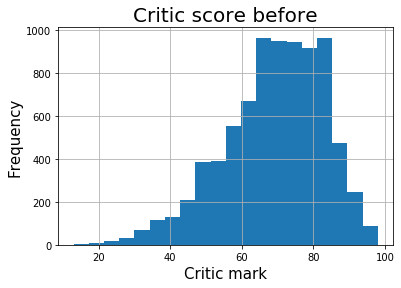

In [21]:
df_games.critic_score.hist(bins = 20)
plt.title('Critic score before', size = 20 )
plt.xlabel('Critic mark',size =15)
plt.ylabel('Frequency',size = 15);
print(df_games.critic_score.describe())

We see that the scatter is normal, and I assume that after we fill in the missing values with 0, we will get a big "pick" at the value 0.

In [22]:
df_games['critic_score'] = df_games['critic_score'].fillna(0)

count    16713.000000
mean        33.578053
std         35.818495
min          0.000000
25%          0.000000
50%          0.000000
75%         70.000000
max         98.000000
Name: critic_score, dtype: float64


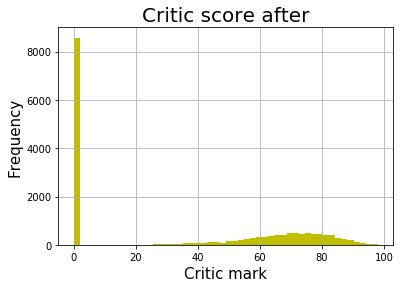

In [23]:
df_games.critic_score.hist(bins = 50,color = 'y')
plt.title('Critic score after', size = 20 )
plt.xlabel('Critic mark',size =15)
plt.ylabel('Frequency',size = 15);
print(df_games.critic_score.describe())

As we assumed earlier, we got a normal scatter except around the value -0.

**We will now handle with the column 'user_score'.<br>**
The treatment will be a bit complicated since the column has values of type 'object', and type 'float'.
The value - 'tbd' says that a rating has not yet been set, so I consider it as the rest of the null values, and then we will fill all the values with 0 as in the column 'critic_score'-
We will check the distribution before and after the addition:

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64


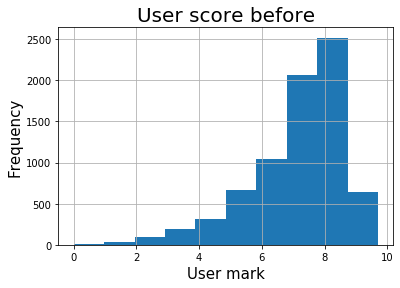

In [24]:
df_games['user_score'] =df_games['user_score'].replace('tbd',np.nan)
df_games.user_score = df_games.user_score.astype('float')

df_games.user_score.hist()
plt.title('User score before', size = 20 )
plt.xlabel('User mark',size =15)
plt.ylabel('Frequency',size = 15);
print(df_games.user_score.describe())

We see that the scatter is normal, and I assume that after we fill in the missing values with 0, we will get a big "pick" at the value 0.

In [25]:
df_games['user_score'] = df_games['user_score'].fillna(0)

count    16713.000000
mean         3.235751
std          3.688806
min          0.000000
25%          0.000000
50%          0.000000
75%          7.300000
max          9.700000
Name: user_score, dtype: float64


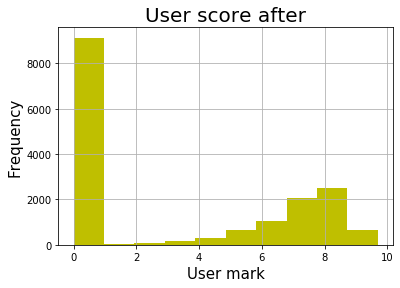

In [26]:
df_games.user_score.hist(color = 'y')
plt.title('User score after', size = 20 )
plt.xlabel('User mark',size =15)
plt.ylabel('Frequency',size = 15);
print(df_games.user_score.describe())

As we assumed earlier, we got a normal scatter except around the value -0.

**We will now fill in the missing values with "Unknown" in the 'rating' column:**<br>
We will fill in the values with "Unknown" because we will later examine the effect of the rating on the sales of the games, and also and perhaps more - the effect of the non-rating on sales.

In [27]:
df_games['rating'] = df_games['rating'].fillna("Unknown")

### We will add a column that calculates the global amount of sales in all regions: 'total_sales'

In [28]:
df_games['total_sales'] = df_games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis = 1)
df_games.sample(3)

name platform  \
7317                           Backyard NFL Football '09      Wii   
9768                                             Zathura      PS2   
14205  Simple DS Series Vol. 8: The Kanshikikan - Kin...       DS   

       year_of_release      genre  na_sales  eu_sales  jp_sales  other_sales  \
7317              2008     Sports      0.20      0.00      0.00         0.02   
9768              2005  Adventure      0.06      0.05      0.00         0.02   
14205             2006  Adventure      0.00      0.00      0.03         0.00   

       critic_score  user_score   rating  total_sales  
7317            0.0         0.0  Unknown         0.22  
9768           43.0         2.0     E10+         0.13  
14205           0.0         0.0  Unknown         0.03

count    16713.000000
mean         0.533315
std          1.548282
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64
3 sigmas test of total_sales result   =  0.98863


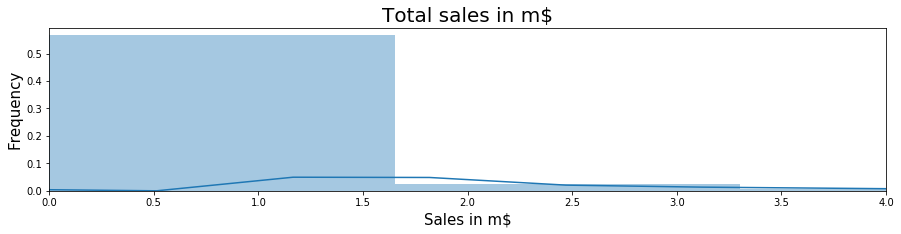

In [29]:
plt.figure(figsize=(15,3))
ax = sns.distplot(df_games.total_sales)
plt.xlim(0, 4)
plt.title('Total sales in m$', size = 20 )
plt.xlabel('Sales in m$',size =15)
plt.ylabel('Frequency',size = 15)
print(df_games.total_sales.describe())
print("3 sigmas test of total_sales result   = ",three_sigmas(df_games,'total_sales'))


<a class="anchor" id="step2.2"></a> 
### Conclusions Step 2.
Based on what we did we can say this:

1. Since it is not possible to know or restore the missing values in the columns 'critic_score' and 'user_score' we filled them in with 0's and we willpay attention to them later if required.
2. We have added a column that calculates sales in all regions, which will allow us to later calculate profitability based on various parameters.
3. There is an interesting statistic, seen in the column 'total_sales'  between 0 and 1.6 million, the distribution is similar to a uniform distribution.

**Now on the basis of the prepared table it is possible to further examine the behavior of customers.**

### Step 2 Readiness Checklist

- [X] Replace the column names (make them lowercase).
- [X] Convert the data to the required types.
- [X] Describe the columns where the data types have been changed and why.
- [X] If necessary, decide how to deal with missing values:Explain why you filled in the missing values as you did or why you decided to leave them blank.
- [X] Why do you think the values are missing? Give possible reasons.
- [X] Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
- [X] Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

<a class="anchor" id="step3."></a>
## Step 3. Analyze the data

**Now that the data is ready, we will dive a little deeper to get a picture of the trends so that we can in the end decide on which platform to invest in next year.**

**Let's take a look at how many games were released in different years:**

In [30]:
df = df_games[['year_of_release','name']].groupby('year_of_release').count().sort_values(by = 'year_of_release').reset_index()
df = df[df['year_of_release'] != 0]


## (I could not decide which way to view the data, so I left both ways ☺)

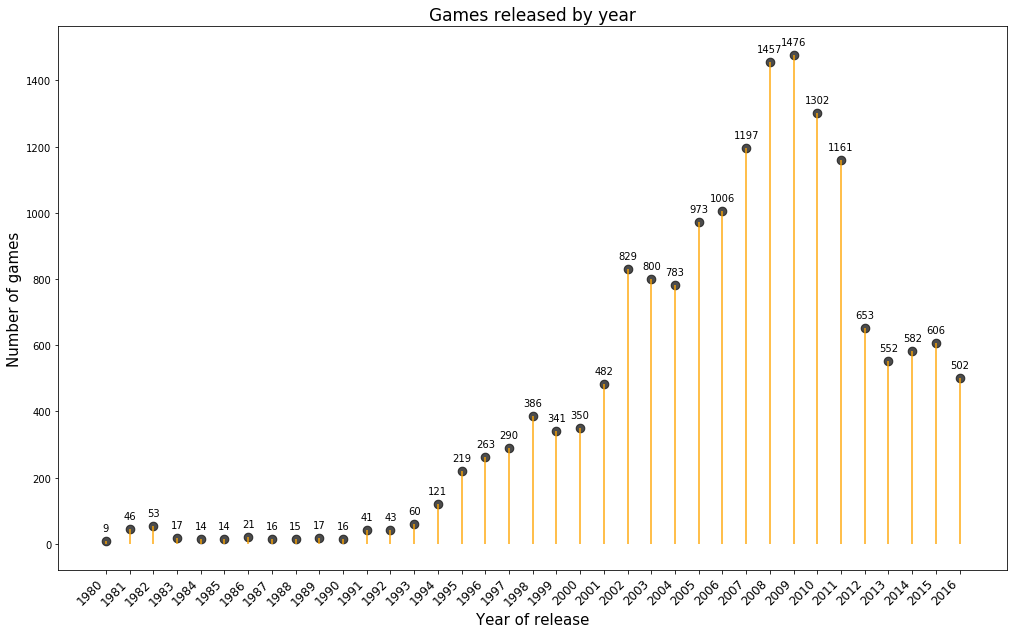

In [31]:
fig,ax = plt.subplots(figsize=(17,10))
ax.vlines(x=df.year_of_release, ymin=0, ymax=df.name, color='orange', alpha = 0.7, linewidth=2)
ax.scatter(x=df.year_of_release, y=df.name, s=75, color='black', alpha =0.7)
ax.set_title('Games released by year', fontdict ={'size':17})
ax.set_ylabel('Number of games',fontdict ={'size':15})
ax.set_xlabel('Year of release',fontdict ={'size':15})
ax.set_xticks(df.year_of_release)
ax.set_xticklabels(df.year_of_release, rotation = 45 , fontdict ={'horizontalalignment':'right','size':12});

for row in df.itertuples():
    ax.text(row.year_of_release,row.name+30, s=round(row.name,2),ha='center')


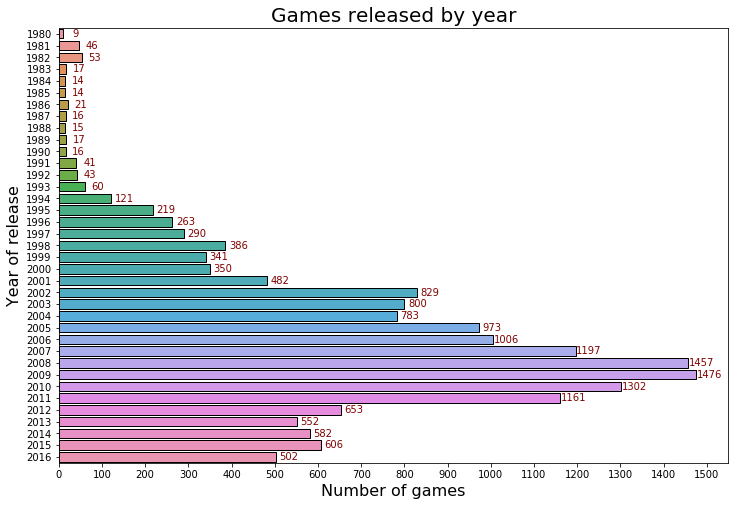

In [32]:
df = df_games[['year_of_release','name']].groupby('year_of_release').count().sort_values(by = 'year_of_release').reset_index()
df = df[df['year_of_release'] != 0]

plt.figure(figsize=(12,8))
ax = sns.barplot(y=df.year_of_release, x=df.name, orient='h',edgecolor='black')
ax.set_xlabel(xlabel='Number of games', fontsize=16)
ax.set_ylabel(ylabel='Year of release', fontsize=16)
ax.set_title(label='Games released by year', fontsize=20)
plt.xticks(np.arange(0, 1600,100))
for row in df.itertuples():
    ax.text(row.name+30,row.year_of_release-1979.75, s=round(row.name,2),ha='center', color='maroon')
plt.show();

<a class="anchor" id="step3.a"></a>
### Conclusion on Games release by year:
- **It can be seen that there has been a consistent but slow increase since 1990.**<br>
- **It can also be seen that the peak years were in 2007- 2008 and after that in 2011 a big fall.**<br>
- **In the years 2000-2001 there seems to be a significant jump of game release, and reaching new heights. Later in the analysis, we would like to check the sales information from these years, since it seems that there is more activity in them.**

### Now we will take a look and analise how sales varied from platform to platform,after that and base on that analysis, we'll choose the platforms with the greatest total sales and build a distribution of greatest platform sales for each year:

**In order to check which platform is with the greatest sales we will use the "Z score" analisies:<br>**
Z score show us how far each value in the total sale column is from the mean in terms of std(more then 3 it mean that its outlier),<br> far and positive indicate best seller platform!

In [33]:
df_sales = df_games[['platform','total_sales']].groupby('platform').sum().sort_values(by = 'total_sales').reset_index()

Convert to std terms:

In [34]:
df_sales['sales_z']=(df_sales['total_sales']-df_sales['total_sales'].mean())/df_sales['total_sales'].std()

Set indicators:

In [35]:
df_sales['color'] = ['red' if x<0 else 'green' for x in df_sales['sales_z']]

### Show the varied platforms sales: 

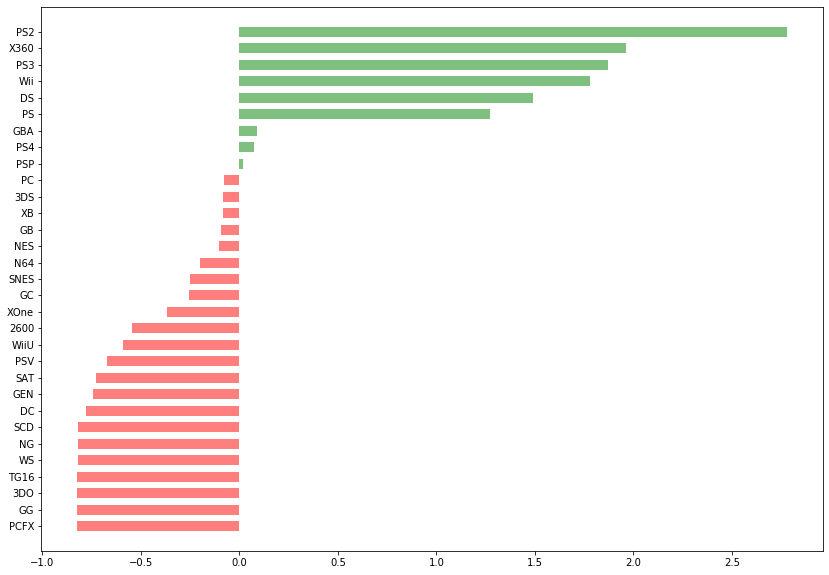

In [36]:
plt.figure(figsize=(14,10))
plt.hlines(y=df_sales.platform , xmin=0 ,xmax=df_sales.sales_z, color=df_sales.color , alpha = 0.5 , linewidth=10);

**It can be clearly seen that the PS2 platform is the platform with the highest Z score.**<br>
There are almost 3 positive deviations from the average.

**Following the analysis, we would also like to see numerical values, we will represent this by a treemap:**

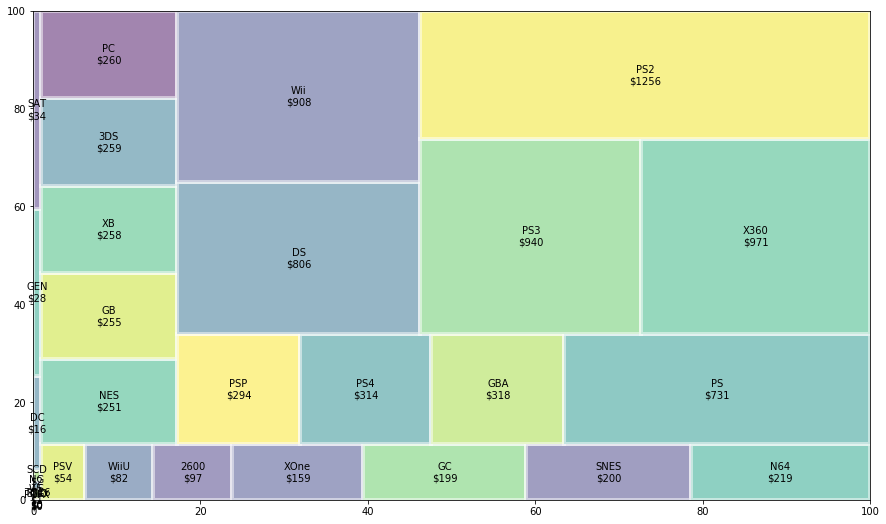

In [37]:
df_tree = df_sales
sizes   = df_tree.total_sales.values.tolist()
labels  = df_tree.apply(lambda x: str(x[0])+"\n"+"$"+str(round(x[1])), axis = 1)
plt.figure(figsize=(15,9))
squarify.plot(sizes=sizes, label = labels, alpha = 0.5,edgecolor = 'white' ,linewidth = 4 );

<a class="anchor" id="step3.b"></a>
### Conclusion varied platforms sales: 

- **In the analysis performed, it is clear that the platform with the biggest sales over the years is "PS2".**<br>
- **Over the years, PS2 sales have totaled over 1 billion dollars** <br>

We will examine the sales distribution of "PS2" by year:

In [38]:
df_ps2 = df_games[df_games['platform'] == 'PS2']
df_ps2 = df_ps2[['year_of_release','total_sales']].groupby('year_of_release').sum().reset_index()


In [39]:
fig = go.Figure(go.Bar(x=df_ps2['year_of_release'],y=df_ps2['total_sales'],
                       marker={'color': df_ps2['total_sales'],'colorscale': 'peach'}))
fig.update_layout(
                title_text='Revenue of PS2 by Years',
                xaxis_title="Year",
                yaxis_title="$ Millions",
                xaxis = dict(
        tickmode = 'linear'))
fig.show()

Contrary to the trend of all the data, in the years 2007-2008 there was actually a **decrease**.<br>
The peack is between the years 2002-2004 with over $ 200 million profit per year.

<div style="border:groove 5px; padding: 40px">
<h2>Finding the relevant period for analyzing by examining the growth and shrink of the platforms sales over the years:</h2>
    
<h3>To find the relevant period for analyzing the data, we will work in three steps:</h3>

**Step 1: Years in the market:** We will prepare a "Dynamic table" showing the profit and loss of each platform compared to the previous year. With the help of the "Dynamic table", We will examine how many years on average it takes for the platform to be in the market by measuring the years it took for each platform to disappear from the market.<br>

**Step 2 Filtering the data:** Once we have identified the average number of years the platform has been on the market, we will want to filter the data so that it shows us from the **current year, minus the number of years we found in Step 1**.

**Step 3 Check the relevance:** After the filtering in step 2,  We will then transfer the data from a filtered "Dynamic table" by the years-  to a hitmap, and with the help of the hitmap we created, we will determine the duration of **relevance** of the platform in the market and **subtract that time from the current year and this will be the time period we continue to analyze the data.**

### Step 1:
We will prepare a "Dynamic table" showing the profit and loss of each platform compared to the previous year.

In [40]:
df_change   = pd.pivot_table(df_games, index = 'year_of_release', 
                            columns = 'platform', values = 'total_sales', 
                            aggfunc = 'sum', fill_value = 0)

df_dynamics = df_change - df_change.shift(+1)
df_dynamics


platform          2600   3DO    3DS    DC      DS     GB    GBA     GC    GEN  \
year_of_release                                                                 
1980               NaN   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1981             24.30  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1982              3.70  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1983            -33.54  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1984             -5.57  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1985              0.18  0.00   0.00  0.00    0.02   0.00   0.00   0.00   0.00   
1986              0.22  0.00   0.00  0.00   -0.02   0.00   0.00   0.00   0.00   
1987              1.27  0.00   0.00  0.00    0.00   0.00   0.00   0.00   0.00   
1988             -1.20  0.00   0.00  0.00    0.00   1.43   0.00   0.00   0.00   
1989             -0.11  0.00   0.00  0.00    0.00  63.54   0.00   0.00   0.00   
1990             -0.63  0.00   0.00  0.00    0.00 -60.08   0.00   0.00   2.60   
1991              0.00  0.00   0.00  0.00    0.00   0.68   0.00   0.00   1.73   
1992              0.00  0.00   0.00  0.00    0.00  19.92   0.00   0.00   8.31   
1993              0.00  0.00   0.00  0.00    0.00 -25.49   0.00   0.00 -11.99   
1994              0.00  0.02   0.00  0.00    0.00  12.18   0.00   0.00   7.48   
1995              0.00  0.06   0.00  0.00    0.00  -8.58   0.00   0.00  -8.13   
1996              0.00 -0.08   0.00  0.00    0.00  32.43   0.00   0.00   0.00   
1997              0.00  0.00   0.00  0.00    0.00 -28.63   0.00   0.00   0.00   
1998              0.00  0.00   0.00  3.38    0.00  19.50   0.00   0.00   0.00   
1999              0.00  0.00   0.00  1.78    0.00  11.10   0.00   0.00   0.00   
2000              0.00  0.00   0.00  0.83    0.00 -18.24   0.07   0.00   0.00   
2001              0.00  0.00   0.00 -4.92    0.00 -10.52  61.46  26.34   0.00   
2002              0.00  0.00   0.00 -0.78    0.00  -9.24  12.63  25.47   0.00   
2003              0.00  0.00   0.00 -0.29    0.00   0.00 -12.52   1.00   0.00   
2004              0.00  0.00   0.00  0.00   17.27   0.00  16.27 -23.99   0.00   
2005              0.00  0.00   0.00  0.00  112.87   0.00 -44.05  -1.20   0.00   
2006              0.00  0.00   0.00  0.00  -10.33   0.00 -28.58 -16.36   0.00   
2007              0.00  0.00   0.00  0.02   27.13   0.00  -1.88 -10.99   0.00   
2008              0.00  0.00   0.00  0.02    1.71   0.00  -3.40  -0.27   0.00   
2009              0.00  0.00   0.00 -0.04  -29.11   0.00   0.00   0.00   0.00   
2010              0.00  0.00   0.00  0.00  -34.52   0.00   0.00   0.00   0.00   
2011              0.00  0.00  63.20  0.00  -58.84   0.00   0.00   0.00   0.00   
2012              0.00  0.00 -11.84  0.00  -15.17   0.00   0.00   0.00   0.00   
2013              0.00  0.00   6.40  0.00   -9.47   0.00   0.00   0.00   0.00   
2014              0.00  0.00 -14.00  0.00   -1.54   0.00   0.00   0.00   0.00   
2015              0.00  0.00 -15.98  0.00    0.00   0.00   0.00   0.00   0.00   
2016              0.00  0.00 -12.64  0.00    0.00   0.00   0.00   0.00   0.00   

platform           GG  ...   SAT   SCD   SNES  TG16    WS     Wii   WiiU  \
year_of_release        ...                                                 
1980              NaN  ...   NaN   NaN    NaN   NaN   NaN     NaN    NaN   
1981             0.00  ...  0.00  0.00   0.00  0.00  0.00    0.00   0.00   
1982             0.00  ...  0.00  0.00   0.00  0.00  0.00    0.00   0.00   
1983             0.00  ...  0.00  0.00   0.00  0.00  0.00    0.00   0.00   
1984             0.00  ...  0.00  0.00   0.00  0.00  0.00    0.00   0.00   
1985             0.00  ...  0.00  0.00   0.00  0.00  0.00    0.00   0.00   
1986             0.00  ...  0.00  0.00   0.00  0.00  0.00    0.00   0.00   
1987             0.00  ...  0.00  0.00   0.00  0.00  0.00    0.00   0.00   
1988             0.00  ...  0.00  0.00   0.00  0.00  0.00    0.00   0.00   
1989

**With the help of the "Dynamic table", We will examine how many years on average it takes for the platform to be in the market by measuring the years it took for each platform to disappear from the market:**


In [41]:
fade_years = df_dynamics.T.astype(bool).sum(axis=1).sort_values(ascending = False)
fade_years

platform
PC      30
GB      16
DS      14
NES     14
PS2     14
PSP     14
X360    13
PS      12
PS3     12
Wii     12
SNES    12
XB      11
2600    11
GBA     10
DC      10
N64      9
GC       9
SAT      8
GEN      7
3DS      7
PSV      7
NG       6
WiiU     6
WS       5
PS4      5
XOne     5
SCD      4
3DO      4
GG       3
TG16     3
PCFX     3
dtype: int64

In [42]:
print(f'The average time it takes to fade from the moment the platform appears is: {round(fade_years.mean(),2)} years.')

The average time it takes to fade from the moment the platform appears is: 9.55 years.


### We will represent this in the following graph:

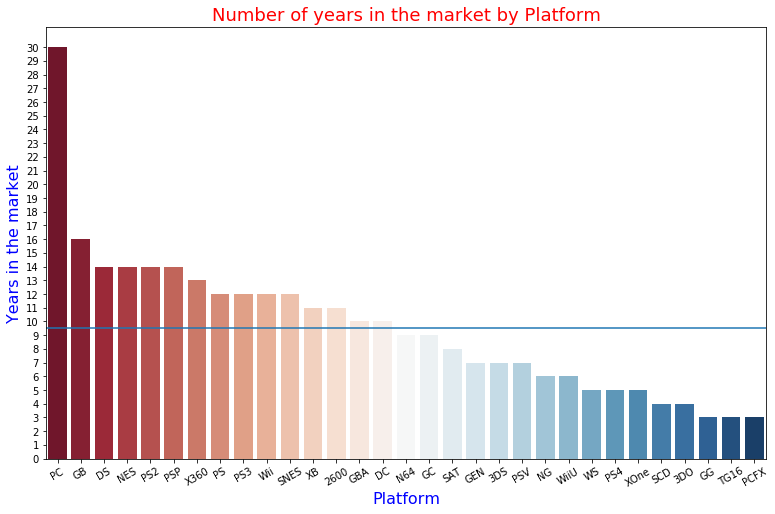

In [43]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])

platform = fade_years.index
year = fade_years.values

plt.yticks(np.arange(0, year.max()+1))
sns.barplot(x=platform, y=year, palette="RdBu")
plt.xticks(rotation= 30)
plt.xlabel("Platform", fontsize=16, color="blue")
plt.ylabel("Years in the market", fontsize=16, color="blue")
plt.axhline(fade_years.mean())
plt.title("Number of years in the market by Platform", fontsize=18, color="red")
plt.show()

<a class="anchor" id="step3.c"></a>

### Conclusion Step 1. 
(How long does it generally take for new platforms to appear and old ones to fade)

- **The average "life time" (in years) of the platform from the moment it appears on the market until the moment it disappear is almost 10 years.
- **The most stable platform is not surprisingly the PC, we can say that this platform is immortal!**

### Step 2:
We identified that the average number of years the platform has been on the market is 10 years.<br>
Now we will filter the data so that it shows us from the **current year, minus 10 year (2016 - 10 = 2006):**

In [44]:
df_filtered_dynamics = df_dynamics.query('year_of_release >2006')
df_filtered_dynamics.loc['total',:]= df_filtered_dynamics.sum(axis=0)
df_filtered_dynamics = df_filtered_dynamics.T.query('total!=0')
df_filtered_dynamics.drop("total",axis = 1,inplace=True)

### Step 3 Check the relevance:
After the filtering in step 2,  We now transfer the data to a hitmap, and after -  We will determine the duration of **relevance** of the platform in the market and **subtract that time from the current year and this will be the time period we continue to analyze the data.**

Building a hitmap : 

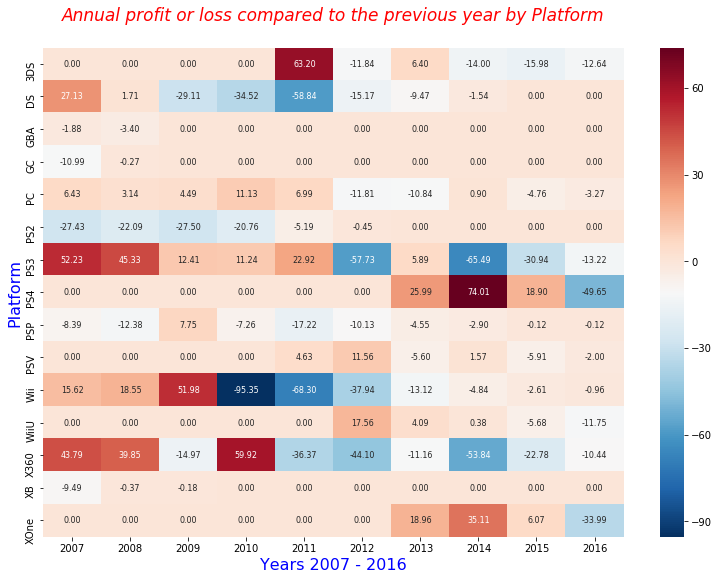

In [45]:
plt.figure(figsize = (13,9))
sns.heatmap(df_filtered_dynamics, cmap = 'RdBu_r',annot=True, fmt=".2f",annot_kws={'size':8})
ax.set_ylim((0,15))
plt.title("Annual profit or loss compared to the previous year by Platform\n", fontsize = 17,color = 'r', fontstyle='italic')
plt.xlabel('Years 2007 - 2016',fontsize=16, color="blue")
plt.ylabel('Platform',fontsize=16, color="blue")
plt.show();

According to the hitmap it is clear that the number of years relevant to each platform is 4 years + - (it is easy to identify this based on the darker red colors).<br>
**Hence-**
If we want to determine which game or platform is more "powerful" for our campaign, we would like to filter the data **back 4 years in order to identify current trends!**

**Filtering the data:**

In [46]:
df_games_filtered = df_games.query('year_of_release >= 2012')
df_games_filtered.sort_values('year_of_release').head(1)

name platform  year_of_release         genre  na_sales  \
8251  The Secret World       PC             2012  Role-Playing      0.07   

      eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
8251      0.08       0.0         0.02          74.0         8.2      M   

      total_sales  
8251         0.17

In [47]:
df_games_filtered_1 = df_games_filtered.groupby('platform')['total_sales'].sum().reset_index().sort_values('total_sales',ascending = False)

fig = go.Figure(go.Bar(x=df_games_filtered_1['platform'],y=df_games_filtered_1['total_sales'],
                       marker={'color': df_games_filtered_1['total_sales'],'colorscale': 'magma'}))
fig.update_layout(
                title_text='Revenue of Platform by Years (2012 - 2016)',
                xaxis_title="Year",
                yaxis_title="$ Millions",
                xaxis = dict(
        tickmode = 'linear'))
fig.show()

<a class="anchor" id="step3.d"></a>
### Conclusion  Finding the relevant period:

After the three steps it can be concluded that:

1. The average period that a platform survives in the market is 10 years.
2. During the time the platform is in existence, the time it is relevant and profitable is a period of 4 years.

Based on these conclusions, we filtered our data for the years 2012 to 2016 in order to identify the trends relevant to our research.
#### The potential platforms I would mark for the future:
1. PC - Because of its stability over the years.
2. PS4 -Leads in sales in the relevant period.
3. XOne - The leading competitor in sales in the relevant period.

### In order to see if there is significant differences in sales between platforms, We'll build a box plot for the global sales of all games, broken down by platform:

In [48]:
platform_sales = df_games_filtered.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
ordered = platform_sales.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()['platform']

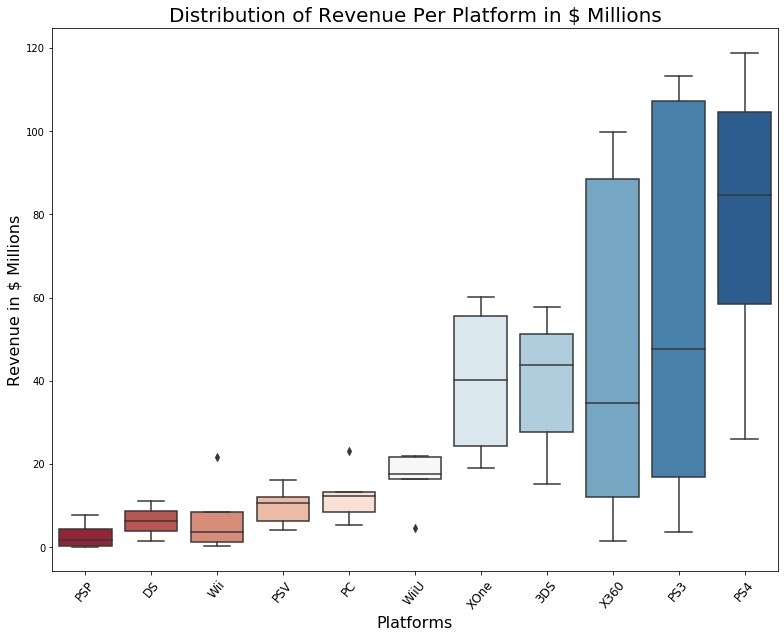

In [49]:
plt.figure(figsize=(13,10))
ax =sns.boxplot(x='platform', y='total_sales',data= platform_sales,palette="RdBu", order =ordered )
ax.set_xticklabels(labels= ordered , fontsize=12, rotation=50)
ax.set_ylabel(ylabel='Revenue in $ Millions', fontsize=16)
ax.set_xlabel(xlabel='Platforms', fontsize=16)
ax.set_title(label='Distribution of Revenue Per Platform in $ Millions', fontsize=20)
plt.show();

<a class="anchor" id="step3.e"></a>
### Conclusion differences in sales between platforms :

- **The PS4 leads in all parameters over all competitors in the relevant period (median and top sales).**
- **The top four platforms (after PS4) have almost the same median.**

**To summarize the analysis - there is a significant difference between the averages of the various platforms, and the sales data. Very significant changes.**

## Now it's interesting to know ,if the critics have any influences?
**We will filter the data according to a very leading platform -the PS4 and measure the effects of the critics on the sales and maybe themselfs?.**

We will see the influences of the critics on sales, and the professional critics on that of the users and show that with the help of scatter plots:

In [50]:
df_PS4 = df_games_filtered[(df_games_filtered['platform'] == 'PS4')&(df_games_filtered['critic_score']> 0)]
df_PS4 = df_PS4.loc[:,["critic_score","user_score","total_sales" ]]

df_PS4["index"] = np.arange(1,len(df_PS4)+1)
# scatter matrix
fig = ff.create_scatterplotmatrix(df_PS4, diag='box', index='index',colormap='YlOrRd',
                                  colormap_type='seq',title = 'Correlation test between critics and "PS4" total sales',
                                  height=700, width=800)
iplot(fig)

  <a class="anchor" id="step3.f"></a>

## Conclusions critics influences
- **It can be seen that there is a (but relatively small) influences of the professional critics on the sales, the higher the scores the higher the sales.**

We will check this in a measurable way with the help of the correlation table:

In [51]:
df_PS4.corr()['total_sales']

critic_score    0.406568
user_score     -0.002730
total_sales     1.000000
index          -0.715520
Name: total_sales, dtype: float64

As we observed, there is a weak positive relationship between the professional critics and sales, although it is not really strong (close to 0.40).

## We will examine the correlation between visitors and sales on the rest of the platforms, are the correlations similar for everyone?

In [52]:
#ordered = platform_sales.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()['platform']
df_scatt = df_games_filtered[df_games_filtered['critic_score']> 0]
df_scatt = df_scatt[['platform', 'critic_score','user_score', 'total_sales']]

In [53]:
def corr(platform):
    
    df = df_scatt[df_scatt['platform']== platform]
    f,ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(df.corr() ,annot=True, linewidths=.9, linecolor='white', fmt= '.2f',ax=ax,vmin=-1,vmax=1)
    plt.show();

The correlation between Wii total sales and critics reviews :



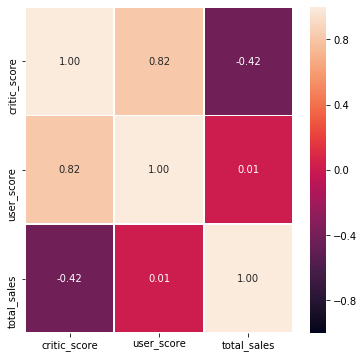

None
The correlation between PSV total sales and critics reviews :



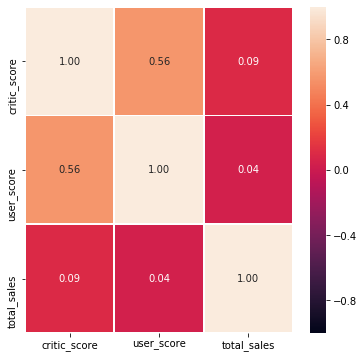

None
The correlation between PC total sales and critics reviews :



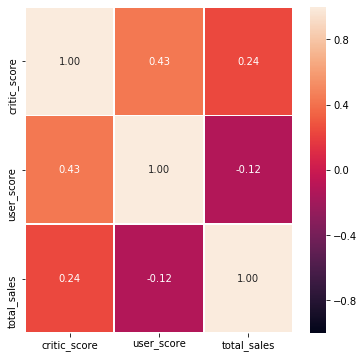

None
The correlation between WiiU total sales and critics reviews :



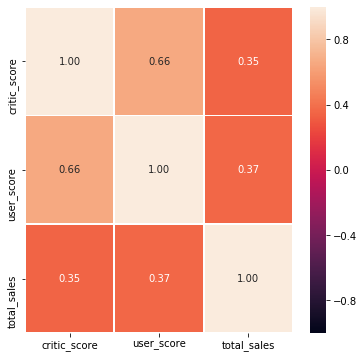

None
The correlation between XOne total sales and critics reviews :



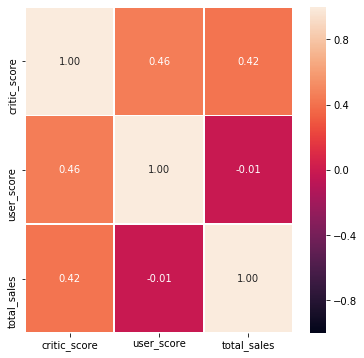

None
The correlation between 3DS total sales and critics reviews :



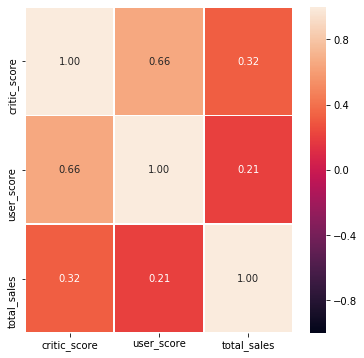

None
The correlation between X360 total sales and critics reviews :



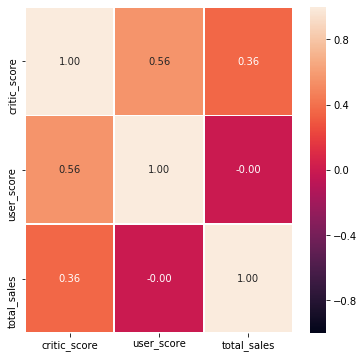

None
The correlation between PS3 total sales and critics reviews :



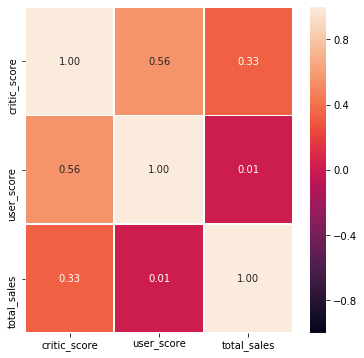

None
The correlation between PS4 total sales and critics reviews :



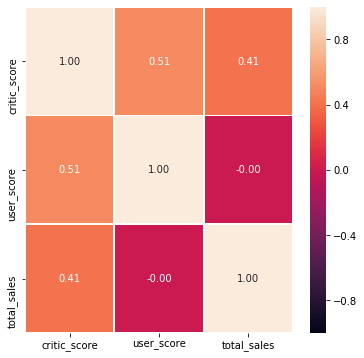

None


In [54]:
lst = ordered.tail(9).tolist()

for i in lst:
    print(f'The correlation between {i} total sales and critics reviews :\n')
    print(corr(i))


**Thanks to the hitmap at a glance we were able to notice that most of the platforms have the same correlation between sales and reviews. It can be seen that the strongest connection between the professional critics and the sales is in the XOne and PS4 platform.**

## Determine which genre is the most profitable:

1. First we will look at the  total sales by genre.
2. Then we will look at the average sales value per genre.

In [55]:
# Total Sales by Genre 
genre = df_games_filtered.loc[:,['genre','total_sales']]
genre['total_sales'] = genre.groupby('genre')['total_sales'].transform('sum')
genre['mean'] = genre['total_sales']/genre['total_sales'].sum()
genre = genre.drop_duplicates()
fig = px.pie(genre, names='genre', values='total_sales', template='seaborn')
fig.update_traces(  hoverinfo ="label",
                    rotation=45,
                    pull=[0.03,0,0.05,0.03,0.04,0.08,0,0.07,0.2,0,0.03,0,0.2],
                    textinfo="label+percent",
                    textfont_size=10
                  )
fig.update_layout(title="The Sales of Games Released by Genre (In M$)",title_x=0)
fig.show()


# Video Game avarage sells by Genre
genre_with_game = df_games_filtered.pivot_table(index = 'genre', values = ['total_sales'], aggfunc =['count','mean'])
genre_with_game = genre_with_game.reset_index()
genre_with_game.columns = ['genre','count', 'mean']

fig = go.Figure([go.Pie(labels=genre_with_game['genre'], 
                        values= round(genre_with_game['mean'],2)*1000000,
                        hole=0.3)])  

fig.update_traces(
                   hoverinfo='label+percent+value', 
                   textinfo='value+label', 
                   textfont_size=10,
                   pull=[0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.2,0,0.03,0,0.2]
                    )
fig.update_layout(title="The Aaverage Sales per Genre (In M$)",title_x=0)
fig.show()        

<a class="anchor" id="step3.g"></a>
## Conclusions games by genre
- **The largest market share genre is the genre "Action" constitutes about 30.5%!**
- **The largest average sales per genre is the genre "Shotter" with 1,290,000 dollars! .**


- **The smallest market share genre is the genre "Puzzle" constitutes about just 0.338%**
- **The smallest average sales per genre is the genre "Adventure" with just 100,000 dollars.**


# Conclusions Step 3.<a class="anchor" id="step3.3"></a> 

**After conducting an in-depth investigation of the data we conclude a number of things:**

1. **The years in which the most games were released are 2007-2008. Maybe there is a connection between this and the launch of new  platforms?**

2. **We found that the average time that a platform "survives" in the market is about 10 years, it is already recommended to start looking to invest in games that play them on platforms that are in progress (4 years).**

3. **Based on the analysis, we have seen that the relevant period for the platform in the market is 4 years and this is the period in which it is correct to check the data.**

4. **here is no strong connection between reviews and sales, we can think of how to elevate it to profit in our meeting on the campaign.**

5. **The best-selling genre is "Action", we can start and check which games can be invested in which they are considered in this genre. Alternatively, we can actually look at an unsaturated market, and perhaps invest in genres that fail to sell.**


After all the knowledge we have accumulated it is possible to build more profiled profiles based on regions:


### Step 3 Readiness Checklist

- [X] Look at how many games were released in different years. Is the data for every period significant?
- [X] Look at how sales varied from platform to platform. 
- [X] Choose the platforms with the greatest total sales and build a distribution based on data for each year. 
- [X] Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?
- [X] Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.
- [X] Work only with the data that you've decided is relevant. Disregard the data for previous years.
- [X] Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
- [X] Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.
- [X] Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
- [X] Keeping your conclusions in mind, compare the sales of the same games on other platforms.
- [X] Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

<a class="anchor" id="step4."></a> 
# Step 4. Create a user profile for each region

**We will look for high-profit parameters video game features with the help of the following analysis-**

<a class="anchor" id="step4.a"></a> 
## A) Top 5 profitable platform by regions-

**We will create a profile for each region according to the sum of sales over the years by regions:<br>**
We will create this in a convenient way-

In [56]:
EU = df_games_filtered.pivot_table('eu_sales', columns='platform', aggfunc='sum').T
EU = EU.sort_values(by='eu_sales', ascending=False).iloc[0:5]
EU_platform = EU.index

JP = df_games_filtered.pivot_table('jp_sales', columns='platform', aggfunc='sum').T
JP = JP.sort_values(by='jp_sales', ascending=False).iloc[0:5]
JP_platform = JP.index

NA = df_games_filtered.pivot_table('na_sales', columns='platform', aggfunc='sum').T
NA = NA.sort_values(by='na_sales', ascending=False).iloc[0:5]
NA_platform = NA.index

Other = df_games_filtered.pivot_table('other_sales', columns='platform', aggfunc='sum').T
Other = Other.sort_values(by='other_sales', ascending=False).iloc[0:5]
Other_platform = Other.index

Total = df_games_filtered.pivot_table('total_sales', columns='platform', aggfunc='sum').T
Total = Total.sort_values(by='total_sales', ascending=False).iloc[0:5]
Total_platform = Total.index

In [57]:
# Initialize figure
fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Bar(y=NA['na_sales'],
           x=NA_platform,
           name="North America",
          marker={'color': NA['na_sales'],'colorscale': 'burgyl'}))
fig.add_trace(
    go.Bar(y=EU['eu_sales'],
           x=EU_platform,
           name="Europe",
           marker={'color': EU['eu_sales'],'colorscale': 'burgyl'},
           visible=False))
fig.add_trace(
    go.Bar(y=JP['jp_sales'],
           x=JP_platform,
           name="Japan",
           marker={'color': JP['jp_sales'],'colorscale': 'burgyl'},
           visible=False))

fig.add_trace(
    go.Bar(y=Other['other_sales'],
           x=Other_platform,
           name="Others",
           marker={'color': Other['other_sales'],'colorscale': 'burgyl'},
           visible=False))

fig.add_trace(
    go.Bar(y=Total['total_sales'],
           x=Total_platform,
           name="Total",
           marker={'color': Total['total_sales'],'colorscale': 'Portland'},
               visible=False ))

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=1,
            y=1.2,
            buttons=list([
                dict(label="North America",
                     method="update",
                     args=[{"visible": [True, False,False, False, False]},
                           {"title": "Top 5 Platforms for North America"}]),
                dict(label="Europe",
                     method="update",
                     args=[{"visible": [False,True, False, False, False]},
                           {"title": "Top 5 Platforms for Europe"}]),
                dict(label="Japan",
                     method="update",
                     args=[{"visible": [False,False, True, False, False]},
                           {"title": "Top 5 Platforms for Japan"}]),
                dict(label="Others",
                     method="update",
                     args=[{"visible": [False,False, False, True, False]},
                           {"title": "Top 5 Platforms for Other Region"}]),
                dict(label="Total",
                     method="update",
                     args=[{"visible": [False,False, False, False, True]},
                           {"title": "Top 5 Platforms for Total"}]),
            ]),
        )
    ])

# Set title
fig.update_layout(
    title_text="Top 5 Platforms per region",
    xaxis_domain=[0.05, 1.0],
    xaxis_title="Platforms",
    yaxis_title="Revenue in $ Milions",
        font=dict(
        family="monospace",
        size=13,
        color="RebeccaPurple")
    )    


fig.show()

<a class="anchor" id="step4.a.c"></a> 

## A) Conclusions platform sales by region

- **There are differences between the leading platforms between the regions:**
- In NA leading X360.
- In Europ leading PS4.
- And in Japan leading 3DS.

- **In Japan, Sony is the leading manufacturer, but in first place is Nintendo (with 3DS Platform).**
- **The top five platforms in Europ are a reflection of the top five in Other regions.

<a class="anchor" id="step4.b"></a> 
## B) Top 5 profitable genres by regions

**We will create a profile for each region according to the sum of sales over the years by genres:<br>**
We will create this in a subplots-

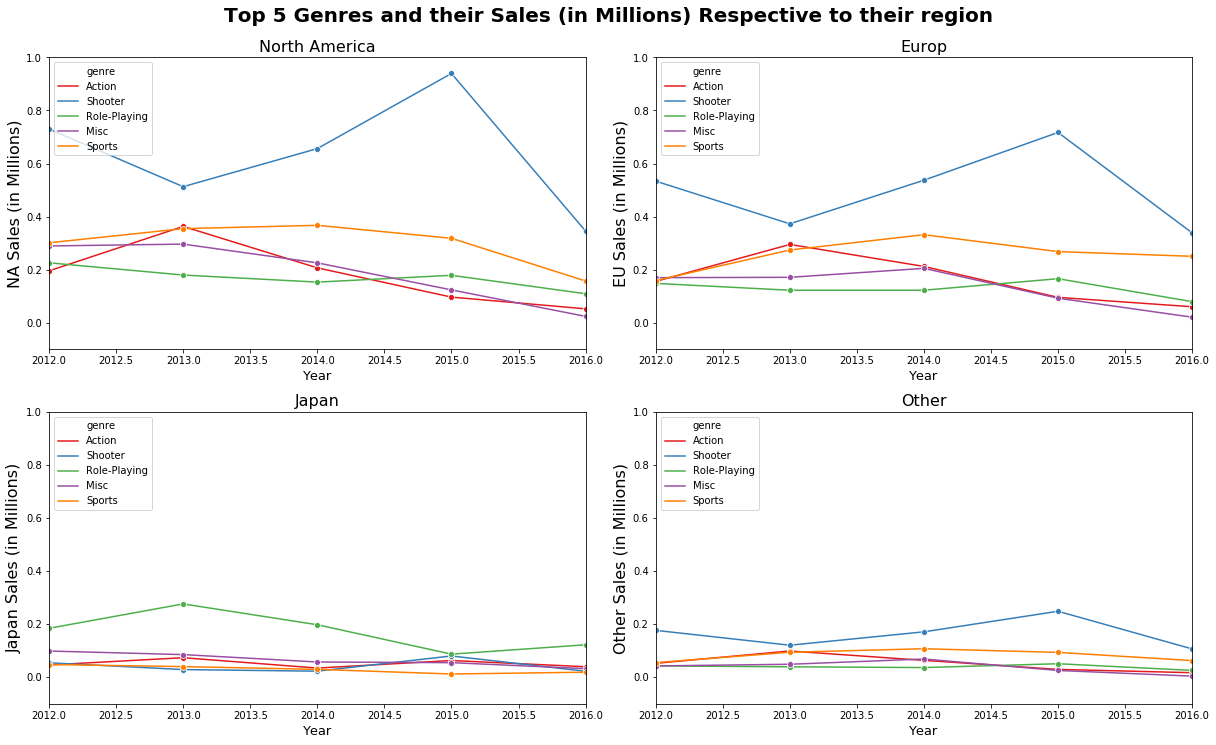

In [58]:
genres_list = df_games_filtered.groupby(['genre'])['total_sales'].sum().sort_values(ascending=False).head(5).index

genres_list = df_games_filtered[df_games_filtered.genre.isin(genres_list)]

fig, (ax0,ax1) = plt.subplots(2,2, figsize=(17,10))
fig.suptitle('Top 5 Genres and their Sales (in Millions) Respective to their region', fontsize=20, fontweight = 'bold', y=1.03)


sns.lineplot(x='year_of_release', y='na_sales', hue='genre', data=genres_list, ci=None, ax=ax0[0], palette='Set1',marker="o")

sns.lineplot(x='year_of_release', y='eu_sales', hue='genre', data=genres_list, ci=None, ax=ax0[1], palette='Set1',marker="o")

sns.lineplot(x='year_of_release', y='jp_sales', hue='genre', data=genres_list, ci=None, ax=ax1[0], palette='Set1',marker="o")

sns.lineplot(x='year_of_release', y='other_sales', hue='genre', data=genres_list, ci=None, ax=ax1[1], palette='Set1',marker="o")

ax0[0].legend(loc='upper left')
ax0[1].legend(loc='upper left')
ax1[0].legend(loc='upper left')
ax1[1].legend(loc='upper left')

ax0[0].set_ylim(-0.1,1)
ax0[1].set_ylim(-0.1,1)
ax1[0].set_ylim(-0.1,1)
ax1[1].set_ylim(-0.1,1)

ax0[0].set_xlim(2012,2016)
ax0[1].set_xlim(2012,2016)
ax1[0].set_xlim(2012,2016)
ax1[1].set_xlim(2012,2016)

ax0[0].set_ylabel('NA Sales (in Millions)', fontsize=16)
ax0[1].set_ylabel('EU Sales (in Millions)', fontsize=16)
ax1[0].set_ylabel('Japan Sales (in Millions)', fontsize=16)
ax1[1].set_ylabel('Other Sales (in Millions)', fontsize=16)

ax0[0].set_title('North America', fontsize=16)
ax0[1].set_title('Europ', fontsize=16)
ax1[0].set_title('Japan', fontsize=16)
ax1[1].set_title('Other', fontsize=16)

ax0[0].set_xlabel('Year', fontsize=13)
ax0[1].set_xlabel('Year', fontsize=13)
ax1[0].set_xlabel('Year', fontsize=13)
ax1[1].set_xlabel('Year', fontsize=13)

plt.tight_layout()
plt.show()

<a class="anchor" id="step4.b.c"></a> 

## B) Conclusions platform sales by genre

- **There are differences between the leading platforms between the regions:**
- In NA leading "Shooter".
- In Europ leading "Shooter".
- And in Japan leading "Role-Playing".

- **While in Europe and North America the leading genres are "Shooter","Sports", in Japan these genres are the least profitable, quite the opposite.**
- **The most profitable genres in Japan are "Role-Playing"**


## C) Check if the ESRB rating affect sales by regions -<a class="anchor" id="step4.c"></a> 



**We will create a profile for each region according to the ESRB rating by sales:<br>**
We will create this in a 100% interactive stack -

In [59]:
esrb = df_games_filtered.pivot_table(index = 'rating', values = ['eu_sales','na_sales','jp_sales','other_sales'], aggfunc = 'sum')


In [62]:
rating = df_games_filtered['rating'].unique()

na_sales=[]
eu_sales=[]
jp_sales=[]
other_sales=[]
total_sales=[]
for i in rating:
    val=df_games_filtered[df_games_filtered.rating==i]
    na_sales.append(val.na_sales.sum())
    eu_sales.append(val.eu_sales.sum())
    jp_sales.append(val.jp_sales.sum())
    other_sales.append(val.other_sales.sum())

In [63]:
fig = go.Figure()
fig.add_trace(go.Bar(x=na_sales,
                     y=rating,
                     name='North America Sales',
                     marker_color='teal',
                     orientation='h'))

fig.add_trace(go.Bar(x=eu_sales,
                     y=rating,
                     name='Europe Sales',
                     marker_color='purple',
                     orientation='h'))

fig.add_trace(go.Bar(x=jp_sales,
                     y=rating,
                     name='Japan Sales',
                     marker_color='gold',
                     orientation='h'))

fig.add_trace(go.Bar(x=other_sales,
                     y=rating,
                     name='Other Region Sales',
                     marker_color='deepskyblue',
                     orientation='h'))

fig.update_layout(title_text='Regions Total Sales by ESRB Rating',
                  xaxis_title="Sales in $M",
                  yaxis_title="Rating Code",
                  barmode='overlay')

fig.show()
#     ['stack', 'group', 'overlay', 'relative']

<a class="anchor" id="step4.c.c"></a> 
## Conclusions sales by ESRB rating

First let's make an order:<br>
E –    Everyone<br>
M –    Mature<br>
T –    Teen<br>
E10+ – Everyone 10 and Older<br>
EC –   Early Childhood<br>
Ao –   Adults only<br>
RP –   Rating Pending<br>
K-A –  Kids to Adults<br>

**From the diagram it can be concluded that:**

**North America-<br>**
    The most purchased category is - M<br>
    The least bought category is - T<br>

**Europe-<br>**
    The most purchased category is - M<br>
    The least bought category is - T<br>

**Japan-<br>**
    The most purchased category is - E<br>
    The least bought category is - E + 10<br>

**It can be assumed that the category definitely affects whether to buy the game or not.**

Regarding the Unknown category - the interesting statistic is that in the three areas sales are quite similar. (Between 92M and 109M).

<a class="anchor" id="step4.4"></a> 

# Conclusions Step 4.
### We created profiles based on various parameters from the data:

1. **It seems that the best-selling platform is Sony's PS4.**
2. **The most played genre is "Shooter" while in Japan it is "Role Playing"**
3. **The M-rated game in NA and EU is the best-selling.**

### We can already say that we have reached the mature audience in NA and the EU, while in Japan the target audience will actually be wider.
***And that's a pretty strong conclusion, we've created characteristics for a profitable game, we have something to tell the boss!***


### Step 4 Readiness Checklist

- [X] For each region (NA, EU, JP), determine:
 - [X] The top five platforms. Describe variations in their market shares from region to region.
 - [X] The top five genres. Explain the difference.
 - [X] Do ESRB ratings affect sales in individual regions?

<a class ='anchor' id="step5."></a>
## Step 5. Test the following hypotheses:

**<span style="color:green">In this step we will  examine the  hypotheses on averages ratings.<br> First by some two platforms and second by two genres  , we will examine whether the averages is equal or not.</span>**


### General explanation:
Since we were asked to test the user rating mean in 2  different groups,**the sample from both groups does not have the same amount, and the samples are not interdependent** ,we would like to perform a **hypothesis on the equality of two Population means**  and for two different populations variance.<br>
With the help of this test we can answer on this question:<br>Is the average user ratings of the Xbox One and PC platforms are the same?<br>
That depends on the variance of the samples the values are calculated from.<br>
Instead of basing our comparison on the averages alone, we use the data sets to perform a statistical test.<br>
Because We've already checked  that the variances is different, and in general - probably the variance will be different in both populations unless the groups examined overlap.

**So all that left us to do is to write the hypotheses formally:**

<h3><span style="color:orange">We will now test the first hypotheses:
</span></h3>

<a class ='anchor' id="Hypothesis1."></a>
<h3><span style="color:darkblue">Hypothesis 1: Average user ratings of the Xbox One and PC platforms are the same:.</span></h3>
<h4><span style="color:green">H0: Average user ratings of the Xbox One and PC platforms are equal</span></h4> 
<h4><span style="color:red">H1: Average user ratings of the Xbox One and PC platforms are not equal</span></h4><br>
I choose the critical statistical significance level to be 5%.<br><br>
I chose to use the t test (or student test)-<br>
More specifically-ind t test, ind for independent Samples and that is exactly our case.<br>
In this type of test, we  comparing the average of two independent unrelated groups.
Meaning, we are comparing samples from two different populations and are testing whether or not they have a different average.

In [64]:
XOne = df_games[(df_games['platform'] == 'XOne')&(df_games['user_score'] > 0)]['user_score'] #247
PC = df_games[(df_games['platform'] == 'PC')&(df_games['user_score'] > 0)]['user_score'] #974

The p-value is:  4.935072360183565e-06
4.935072360183565e-06 < 0.05 
We reject the null hypothesis (H0).


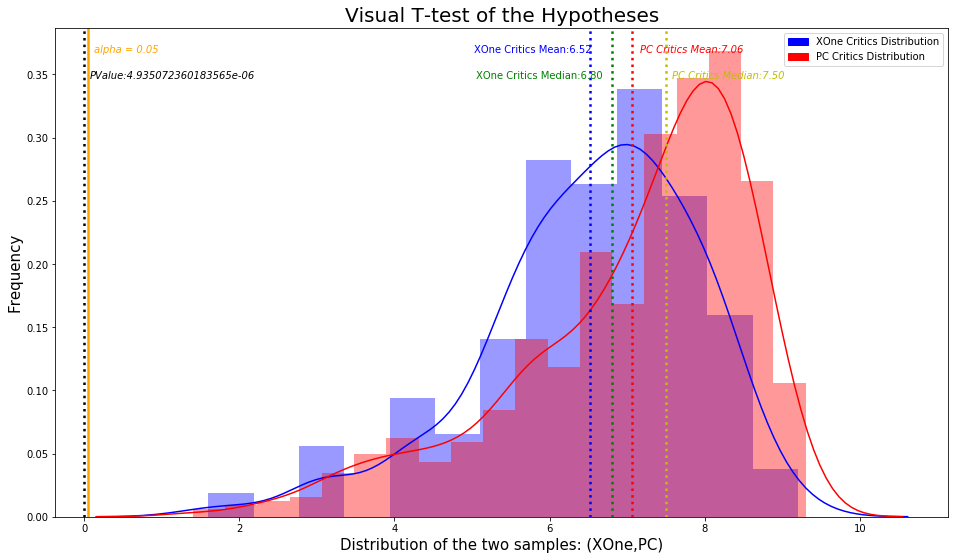

In [65]:
sample_1 = XOne
sample_2 = PC

alpha = 0.05 # critical statistical significance level

results = st.ttest_ind(
         sample_1, 
         sample_2,
         equal_var = False )



#show the to samples distributions:

plt.figure(figsize=(16,9))
ax1 = sns.distplot(sample_1, color = 'b')
ax2 = sns.distplot(sample_2, color = 'r')
#
plt.title('Visual T-test of the Hypotheses', size = 20)
plt.xlabel("Distribution of the two samples: (XOne,PC)", size = 15)
plt.ylabel("Frequency", size = 15)
#
b_patch = mpatches.Patch(color='b', label='XOne Critics Distribution')
r_patch = mpatches.Patch(color='r', label='PC Critics Distribution')
plt.legend(handles=[b_patch,r_patch])
#
#Set Vlines:#
plt.axvline(np.mean(sample_1), color='b', linestyle='dotted', linewidth=2.5)
_, max_ = plt.ylim()

plt.text(
        sample_1.mean()-1.5,
        max_ - max_ / 20,
        "XOne Critics Mean:{:.2f}".format(sample_1.mean()),
        color = 'b',
    )

plt.axvline(np.median(sample_1), color='green', linestyle='dotted', linewidth=2.5)
_, max_ = plt.ylim()

plt.text(
        sample_1.median()-1.75,
        max_ - 0.04,
        "XOne Critics Median:{:.2f}".format(sample_1.median()),
        color = 'green',
    )

plt.axvline(np.mean(sample_2), color='r', linestyle='dotted', linewidth=2.5, )
plt.text(
        sample_2.mean() +0.1,
        max_ - 0.02,
        "PC Critics Mean:{:.2f}".format(sample_2.mean()),
        color = 'r',style = "italic"
    );


plt.axvline(np.median(sample_2), color='y', linestyle='dotted', linewidth=2.5, )
plt.text(
        sample_2.median() +0.075,
        max_ - 0.04,
        "PC Critics Median:{:.2f}".format(sample_2.median()),
        color = 'y',style = "italic"
    );

plt.axvline(results.pvalue, color='black', linestyle='dotted', linewidth=2.5, );
plt.text(
        results.pvalue +0.075,
        max_ - 0.04,
        "PValue:{}".format(results.pvalue),
        color = 'black',style = "italic"
    );

plt.axvline(alpha, color='orange', linestyle='solid', linewidth=2.5, );
plt.text(
        alpha+0.075,
        max_ - 0.02,
        "alpha = {}".format(alpha),
        color = 'orange',style = "italic"
    );


#conclusion:


print('The p-value is: ',results.pvalue)


if (results.pvalue < alpha):
        print(results.pvalue,"<",alpha,"\n"+"We reject the null hypothesis (H0).")
else:
        print(results.pvalue,">",alpha,"\n"+"We can't reject the null hypothesis (H0).") 


<h3><span  style="color:red">It can be clearly seen that the average user ratings of the Xbox One and PC platforms are not equal<br>
The PValue “falls” out of the value that we defined (5%) of the distributions .<br>##We reject the null hypothesis.##</span>
</h3>

<h3><span style="color:orange">We will now test the second hypotheses:
</span></h3>

In this hypothesis we are asked to test if the average user ratings for the Action and Sports genres are different.<br>
In this case we need again to exclude two 'populations' from the whole Data and test it.<br>
**The characteristics are similar** -<br> The size of the samples is different, the variance is different (we will check this of course) and there is no dependence between the two samples!<br>**Therefore everything that was said at the beginning of the previous test is also valid now.**


**We will prepare the data and then test the hypotheses-**

<a class='anchor' id="Hypothesis2."></a>
<h3><span style="color:darkblue">Hypothesis 2: Average user ratings for the Action and Sports genres are differents.</span></h3>
<h4><span style="color:green">H0: The average user ratings for the Action and Sports genres are equal </span></h4> 
<h4><span style="color:red">H1: The average user ratings for the Action and Sports genres are not equal</span></h4><br>
I choose the critical statistical significance level to be 15%.<br><br>
Same here- I chose to use the t test (or student test)-<br>
More specifically-ind t test, ind for independent Samples and that is exactly our case.<br>
In this type of test, we  comparing the average of two independent unrelated groups.
Meaning, we are comparing samples from two different populations and are testing whether or not they have a different average.

In [66]:
Action = df_games[(df_games['genre'] == 'Action')&(df_games['user_score'] > 0)]['user_score'] #3369
Sports = df_games[(df_games['genre'] == 'Sports')&(df_games['user_score'] > 0)]['user_score'] #2348

The p-value is:  0.11483818791498286
0.11483818791498286 < 0.15 
We reject the null hypothesis (H0).


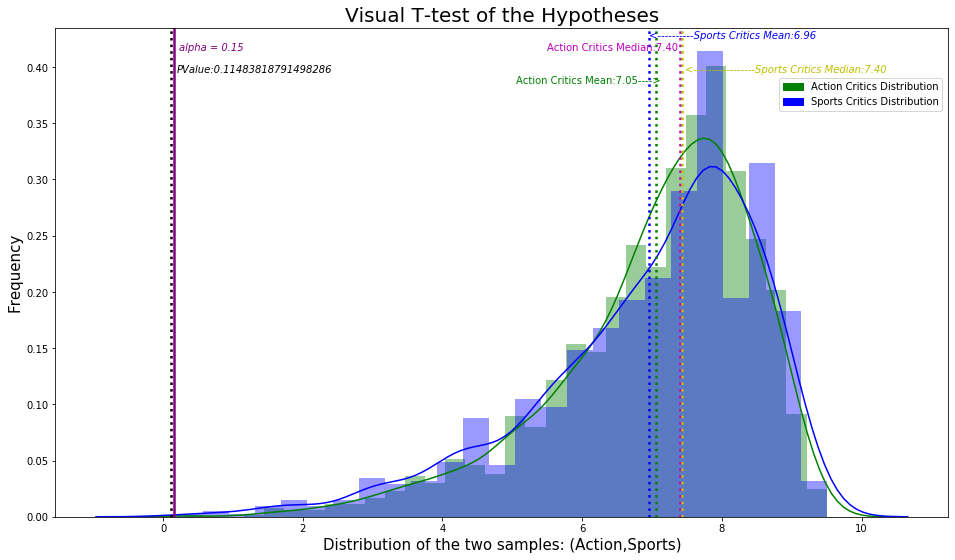

In [67]:
sample_1 = Action
sample_2 = Sports

alpha = 0.15 # critical statistical significance level

results = st.ttest_ind(
         sample_1, 
         sample_2,
         equal_var = False )



#show the to samples distributions:

plt.figure(figsize=(16,9))
ax1 = sns.distplot(sample_1, color = 'g')
ax2 = sns.distplot(sample_2, color = 'b')
#
plt.title('Visual T-test of the Hypotheses', size = 20)
plt.xlabel("Distribution of the two samples: (Action,Sports)", size = 15)
plt.ylabel("Frequency", size = 15)
#
g_patch = mpatches.Patch(color='g', label='Action Critics Distribution')
b_patch = mpatches.Patch(color='b', label='Sports Critics Distribution')
plt.legend(handles=[g_patch,b_patch],loc = (0.81,0.83))
#
#Set Vlines:#
plt.axvline(np.mean(sample_1), color='g', linestyle='dotted', linewidth=2.5)
_, max_ = plt.ylim()

plt.text(
        sample_1.mean()-2,
        max_ - 0.05,
        "Action Critics Mean:{:.2f}".format(sample_1.mean())+"---->",
        color = 'g',
    )

plt.axvline(np.median(sample_1), color='m', linestyle='dotted', linewidth=2.5)
_, max_ = plt.ylim()

plt.text(
        sample_1.median()-1.9,
        max_ - 0.02,
        "Action Critics Median:{:.2f}".format(sample_1.median()),
        color = 'm',
    )

plt.axvline(np.mean(sample_2), color='b', linestyle='dotted', linewidth=2.5, )
plt.text(
        sample_2.mean(),
        max_ - 0.01,
        "<----------Sports Critics Mean:{:.2f}".format(sample_2.mean()),
        color = 'b',style = "italic"
    );


plt.axvline(np.median(sample_2)+0.03, color='y', linestyle='dotted', linewidth=2.5, )
plt.text(
        sample_2.median() +0.07,
        max_ - 0.04,
        "<-----------------Sports Critics Median:{:.2f}".format(sample_2.median()),
        color = 'y',style = "italic"
    );

plt.axvline(results.pvalue, color='black', linestyle='dotted', linewidth=2.5, );
plt.text(
        results.pvalue +0.075,
        max_ - 0.04,
        "PValue:{}".format(results.pvalue),
        color = 'black',style = "italic"
    );

plt.axvline(alpha, color='purple', linestyle='solid', linewidth=2.5, );
plt.text(
        alpha+0.075,
        max_ - 0.02,
        "alpha = {}".format(alpha),
        color = 'purple',style = "italic"
    );




#conclusion:


print('The p-value is: ',results.pvalue)


if (results.pvalue < alpha):
        print(results.pvalue,"<",alpha,"\n"+"We reject the null hypothesis (H0).")
else:
        print(results.pvalue,">",alpha,"\n"+"We can't reject the null hypothesis (H0).") 


<h3><span  style="color:red">It can be clearly seen that the the average user ratings for the Action and Sports genres are not equal<br>
The PValue “falls” out of the value that we defined (15%) of the distributions .<br>##We reject the null hypothesis.##</span>
</h3>

<a class = 'anchor' id="step5.5"></a>
### Conclusions Step 5.
The findings we found are -
1. The claim that the average user ratings of the Xbox One and PC platforms are the same can be rejected.
2. The claim that the average user ratings for the Action and Sports genres are the same can be rejected.

### Step 5 completion checklist

- [X] Average user ratings of the Xbox One and PC platforms are the same.
- [X] Average user ratings for the Action and Sports genres are different.
- [X] Set the alpha threshold value yourself.
- [X] How you formulated the null and alternative hypotheses
- [X] What significance level you chose to test the hypotheses, and why

<a class = 'anchor' id="step6."></a>
## Step 6. Overall conclusions
**After reviewing the data, we went over the missing values, checked that they were indeed correct, went over and researched the important parameters, and even created a profile for what kind of video game we should invest in next year we came to the following conclusions:**<br>
## 1.
### The ultimate game investment profile that i recommend to the management board is:

|**EU and NA**|category        |
|------       |------          |
|Genre        |"Shooter"       |
|Platform     |"PS4" and "X60" |
|ESRB Rating  |      "M"       |

|**Japan**    |category        |
|------       |------          |
|Genre        |"Role-Play"     |
|Platform     |"3DS"           |
|ESRB Rating  |      "E"       |

## 2.
#### It may also be worthwhile to consider an investment option of buying the platforms themselves as they are in high demand in some regions, and may enter the market as a supplier.

## 3. 
#### At the moment the priority is to focus mainly on the large and prifitable regions (NA,EU,JP) and not Other regions, as their relative profit is relatively small.


### Project completion checklist

- [X] How do you describe the problems you identify in the data?
- [X] How do you prepare a dataset for analysis?
- [X] How do you build distribution graphs and how do you explain them?
- [X] How do you calculate standard deviation and variance?
- [X] Do you formulate alternative and null hypotheses?
- [X] What methods do you apply when testing them?
- [X] Do you explain the results of your hypothesis tests?
- [X] Do you follow the project structure and keep your code neat and comprehensible?
- [X] Which conclusions do you reach?
- [X] Did you leave clear, relevant comments at each step?